# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, SeparableConv2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


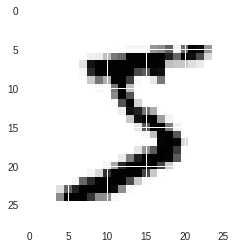

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]
from keras.preprocessing.image import ImageDataGenerator

In [0]:
model = Sequential()
model.add(BatchNormalization(input_shape=(28,28,1)))
model.add(SeparableConv2D(32, (3, 3), strides=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', pointwise_initializer='glorot_uniform', bias_initializer='zeros', depthwise_regularizer=None, pointwise_regularizer=None, bias_regularizer=None, activity_regularizer=None, depthwise_constraint=None, pointwise_constraint=None, bias_constraint=None))
model.add(BatchNormalization())
model.add(SeparableConv2D(32, (3, 3), strides=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', pointwise_initializer='glorot_uniform', bias_initializer='zeros', depthwise_regularizer=None, pointwise_regularizer=None, bias_regularizer=None, activity_regularizer=None, depthwise_constraint=None, pointwise_constraint=None, bias_constraint=None))
model.add(BatchNormalization())
model.add(SeparableConv2D(32, (3, 3), strides=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', pointwise_initializer='glorot_uniform', bias_initializer='zeros', depthwise_regularizer=None, pointwise_regularizer=None, bias_regularizer=None, activity_regularizer=None, depthwise_constraint=None, pointwise_constraint=None, bias_constraint=None))
model.add(BatchNormalization())
model.add(SeparableConv2D(32, (3, 3), strides=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', pointwise_initializer='glorot_uniform', bias_initializer='zeros', depthwise_regularizer=None, pointwise_regularizer=None, bias_regularizer=None, activity_regularizer=None, depthwise_constraint=None, pointwise_constraint=None, bias_constraint=None))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides=None, padding='valid', data_format=None))
model.add(BatchNormalization())
model.add(SeparableConv2D(32, (3, 3), strides=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', pointwise_initializer='glorot_uniform', bias_initializer='zeros', depthwise_regularizer=None, pointwise_regularizer=None, bias_regularizer=None, activity_regularizer=None, depthwise_constraint=None, pointwise_constraint=None, bias_constraint=None))
model.add(BatchNormalization())
model.add(Convolution2D(10, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(10, 8))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Activation('softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_11 (Batc (None, 28, 28, 1)         4         
_________________________________________________________________
separable_conv2d_8 (Separabl (None, 26, 26, 32)        41        
_________________________________________________________________
batch_normalization_12 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
separable_conv2d_9 (Separabl (None, 24, 24, 32)        1312      
_________________________________________________________________
batch_normalization_13 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
separable_conv2d_10 (Separab (None, 22, 22, 32)        1312      
_________________________________________________________________
batch_normalization_14 (Batc (None, 22, 22, 32)        128       
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 56s 930us/step - loss: 0.3746 - acc: 0.9379
Epoch 2/10
60000/60000 [==============================] - 51s 851us/step - loss: 0.1492 - acc: 0.9703
Epoch 3/10
60000/60000 [==============================] - 51s 849us/step - loss: 0.1036 - acc: 0.9775
Epoch 4/10
60000/60000 [==============================] - 51s 847us/step - loss: 0.0816 - acc: 0.9811
Epoch 5/10
60000/60000 [==============================] - 51s 850us/step - loss: 0.0661 - acc: 0.9841
Epoch 6/10
60000/60000 [==============================] - 51s 844us/step - loss: 0.0574 - acc: 0.9858
Epoch 7/10
60000/60000 [==============================] - 51s 845us/step - loss: 0.0508 - acc: 0.9871
Epoch 8/10
60000/60000 [==============================] - 51s 845us/step - loss: 0.0468 - acc: 0.9877
Epoch 9/10
60000/60000 [==============================] - 51s 850us/step - loss: 0.0413 - acc: 0.9896
Epoch 10/10
60000/60000 [=========

In [0]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 52s 871us/step - loss: 0.0366 - acc: 0.9905
Epoch 2/10
60000/60000 [==============================] - 51s 852us/step - loss: 0.0344 - acc: 0.9914
Epoch 3/10
60000/60000 [==============================] - 51s 847us/step - loss: 0.0313 - acc: 0.9915
Epoch 4/10
60000/60000 [==============================] - 51s 843us/step - loss: 0.0299 - acc: 0.9919
Epoch 5/10
60000/60000 [==============================] - 51s 850us/step - loss: 0.0298 - acc: 0.9919
Epoch 6/10
60000/60000 [==============================] - 51s 846us/step - loss: 0.0270 - acc: 0.9925
Epoch 7/10
60000/60000 [==============================] - 50s 841us/step - loss: 0.0247 - acc: 0.9933
Epoch 8/10
60000/60000 [==============================] - 50s 841us/step - loss: 0.0252 - acc: 0.9932
Epoch 9/10
60000/60000 [==============================] - 50s 839us/step - loss: 0.0233 - acc: 0.9939
Epoch 10/10
60000/60000 [==============================] - 50s 831us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.026934996843687258, 0.9922]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.8712011e-05 3.9552135e-05 2.4938723e-05 3.3771099e-05 8.4087524e-06
  5.7478323e-06 1.6754087e-05 9.9983966e-01 2.5506461e-06 9.8425162e-06]
 [6.5147324e-06 2.8361497e-05 9.9978262e-01 4.5458478e-06 7.9092806e-06
  7.7320067e-07 5.5787776e-05 2.3984070e-05 4.0769302e-07 8.9063797e-05]
 [3.9033544e-06 9.9968922e-01 6.1984642e-06 2.9090513e-06 1.5035187e-04
  1.0287407e-04 9.5186388e-06 2.2287706e-05 6.6097564e-06 6.1627807e-06]
 [9.9626040e-01 4.8925511e-05 4.7353890e-07 1.6184561e-03 1.2430452e-05
  4.0253399e-05 1.5361219e-03 8.2577906e-05 3.0296532e-04 9.7395903e-05]
 [2.8330151e-05 4.8674763e-05 2.5683724e-07 8.5121455e-06 9.9988985e-01
  5.3621775e-06 1.3915476e-05 1.0028749e-06 6.4583901e-07 3.4098155e-06]
 [1.2402615e-05 9.9982494e-01 7.3163219e-06 1.2261690e-06 6.3237618e-05
  1.2212333e-05 1.7365594e-06 6.1300074e-05 5.8496585e-06 9.7818647e-06]
 [1.9382868e-07 8.2539773e-05 7.4764939e-05 1.8549783e-06 9.9971014e-01
  9.9964082e-06 1.8152294e-05 5.0403798e-07 9.6732445e-05 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored